In [487]:
import dlib
import cv2
import imutils
import matplotlib.pyplot as plt
import math

## Load Image

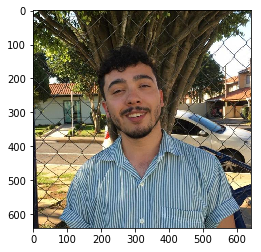

In [488]:
image = cv2.imread('../data/gabriel.jpeg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# size for drawing points with a good size
circle_size = math.ceil(0.008 * (len(image)+len(image))/2)

plt.set_cmap('gray')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_RGB2BGR))

## Load Face Detector and Facial Landmarks Predictor

In [489]:
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('../assets/shape_predictor_68_face_landmarks.dat')

def get_shape_prediction(gray):
    rects = detector(gray)
    shape = predictor(gray, rects[0])
    return shape


## Get Prediction and Calculate Alignment Rotation

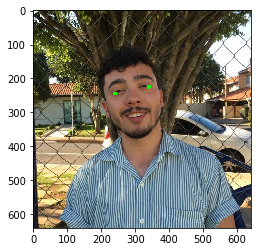

In [490]:
shape = get_shape_prediction(gray)

copy = image.copy()
for i in [36, 45]:
    cv2.circle(copy, (shape.part(i).x, shape.part(i).y), circle_size, (0, 255, 0), -1)

plt.imshow(cv2.cvtColor(copy, cv2.COLOR_RGB2BGR))

## Rotate, Predict landmarks again 

101
0
0.0


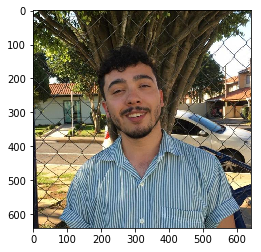

In [496]:
def get_beta(shape):
    h_distance = shape.part(45).x-shape.part(36).x
    v_distance = shape.part(45).y-shape.part(36).y
    print(h_distance)
    print(v_distance)
    return math.degrees(math.atan(v_distance/h_distance))

beta = get_beta(shape)
print(beta)

image_rotated = imutils.rotate_bound(image, -beta)
gray_rotated = imutils.rotate_bound(gray, -beta)

plt.imshow(cv2.cvtColor(image_rotated, cv2.COLOR_RGB2BGR))

In [492]:
rects[0]

rectangle(273,234,453,413)

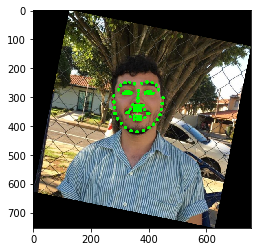

In [493]:
rects = detector(gray_rotated)
shape = predictor(gray_rotated, rects[0])

copy = image_rotated.copy()
for e in shape.parts():
    cv2.circle(copy, (e.x, e.y), circle_size, (0, 255, 0), -1)

plt.imshow(cv2.cvtColor(copy, cv2.COLOR_RGB2BGR))

## Get Area of Interest

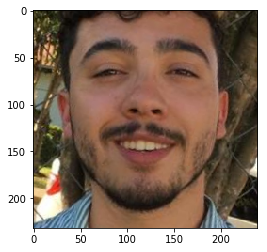

In [494]:
def get_aoi(image):
    margin_w = shape.part(16).x - shape.part(0).x
    margin_w = round(margin_w*.2)
    margin_h = shape.part(9).y - min(shape.part(19).y, shape.part(24).y)
    margin_h = round(margin_h*.2)
    
    x = shape.part(0).x - margin_w
    y = min(shape.part(19).y, shape.part(24).y) - margin_h
    w = shape.part(16).x + margin_w
    h = shape.part(9).y + margin_h
    
    aoi = image[y:h, x:w]
    return  aoi

aoi = get_aoi(image_rotated)

plt.imshow(cv2.cvtColor(aoi, cv2.COLOR_RGB2BGR))

In [495]:
cv2.imwrite('../data/teste.png', aoi)

True